<a href="https://colab.research.google.com/github/savindumahasen/Skin-Disease-Classification-Project/blob/main/Skin_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## install the necessary libraries
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [3]:
## Import the necessary libraries
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [4]:
## download the dataset
od.download("https://www.kaggle.com/datasets/pritpal2873/multiple-skin-disease-detection-and-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: savinduruhunuhewa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pritpal2873/multiple-skin-disease-detection-and-classification


100%|██████████| 785M/785M [00:10<00:00, 75.7MB/s]

In [5]:
## Define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [6]:
## Load the dataset and split into train and test set

skin_cancer_dataset = "/content/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/"

train_set=tf.keras.utils.image_dataset_from_directory(skin_cancer_dataset ,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMAGE_SIZE,
                                                    subset='training',
                                                    validation_split=0.2,
                                                    seed=42)

## this  validation  set treated as test set
test_set=tf.keras.utils.image_dataset_from_directory(skin_cancer_dataset,
                                                         subset='validation',
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         validation_split=0.2,
                                                         seed=42)





Found 4107 files belonging to 9 classes.
Using 3286 files for training.
Found 4107 files belonging to 9 classes.
Using 821 files for validation.


In [7]:
## Get the target values

class_names=train_set.class_names
class_names

['Acitinic Keratosis',
 'Basal Cell Carcinoma',
 'Dermatofibroma',
 'Melanoma',
 'Nevus',
 'Pigmented Benign Keratosis',
 'Seborrheic Keratosis',
 'Squamous Cell Carcinoma',
 'Vascular Lesion']

In [8]:
## Look at the one batch
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


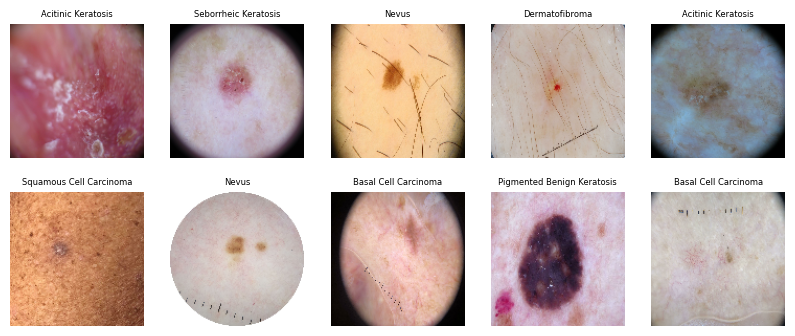

In [9]:
## Plot the training set sample

plt.figure(figsize=(10,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]], fontsize=6)
    plt.axis('off')

In [10]:
## Look at the images pixal values by taking one batch
for image, label in train_set.take(1):
  print(image)

tf.Tensor(
[[[[110.09497   84.923096  98.140625]
   [109.57031   85.542725  96.5271  ]
   [108.1936    85.109375  93.58594 ]
   ...
   [ 96.31421   75.09546   84.75171 ]
   [ 98.046875  76.046875  88.167725]
   [ 93.359375  71.359375  83.61719 ]]

  [[ 87.55835   66.55835   85.105225]
   [ 81.07031   60.190674  75.55469 ]
   [ 74.187744  54.187744  66.01074 ]
   ...
   [101.596436  79.596436  91.596436]
   [102.41089   79.41089   96.13599 ]
   [100.426025  77.426025  95.0437  ]]

  [[109.15625   90.15625  112.15625 ]
   [108.86719   89.86719  109.33594 ]
   [105.44678   87.44678  103.44678 ]
   ...
   [104.44458   82.44458   95.44458 ]
   [104.153564  81.153564  97.82007 ]
   [102.420166  79.420166  96.93237 ]]

  ...

  [[157.4436   144.59985  164.59985 ]
   [156.       141.       160.      ]
   [153.15552  136.15552  153.71802 ]
   ...
   [ 96.63208   73.647705  86.13989 ]
   [117.71118   93.95581   99.95581 ]
   [116.        93.        99.      ]]

  [[157.56665  146.0354   167.8791

In [11]:
## Normalize the  train and test dataset
#train_set_new=train_set.map(lambda x,y:(x/255,y))
#test_set_new=test_set.map(lambda x,y:(x/255,y))

In [12]:
## Print the normalize data of one batch of train set
#for image, label in train_set_new.take(1):
#    print(image)

In [13]:
## use the pre-train  Xception model
#pretrained_model=tf.keras.applications.Xception(include_top=False,
#                               input_shape=(128,128,3),
#                               weights='imagenet',
#                               pooling='max',
#                                               )
#pretrained_model

#for layer in pretrained_model.layers:
#  layer.trainable=False


pretrained_model=tf.keras.applications.ResNet50(include_top=False,
                                                weights='imagenet',
                                                input_shape=(128,128,3),
                                                pooling='max',

)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [14]:
## Build the model

model=tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))

model.add(tf.keras.layers.Dense(9,activation='softmax'))


In [15]:
## get the summary of model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,664,873 (90.27 MB)

 Trainable params: 23,611,753 (90.07 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
## compile the model


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [17]:
## train the model
import time
start_time=time.time()
history=model.fit(train_set, epochs=50)
end_time=time.time()


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 119s 547ms/step - accuracy: 0.2406 - loss: 2.1870
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step - accuracy: 0.4021 - loss: 1.6877
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 338ms/step - accuracy: 0.4334 - loss: 1.5874
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 332ms/step - accuracy: 0.4650 - loss: 1.4906
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 312ms/step - accuracy: 0.4217 - loss: 1.5781
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - accuracy: 0.4102 - loss: 1.6105
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 310ms/step - accuracy: 0.4841 - loss: 1.4037
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 334ms/step - accuracy: 0.5059 - loss: 1.3732
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 316ms/step - accuracy: 0.5769 - loss: 1.2043
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 318ms/step - accuracy: 0.6001 - loss: 1.1292
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 302ms/step - accuracy: 0.6364 - loss: 1.0214
Epoch 12/50
103/10

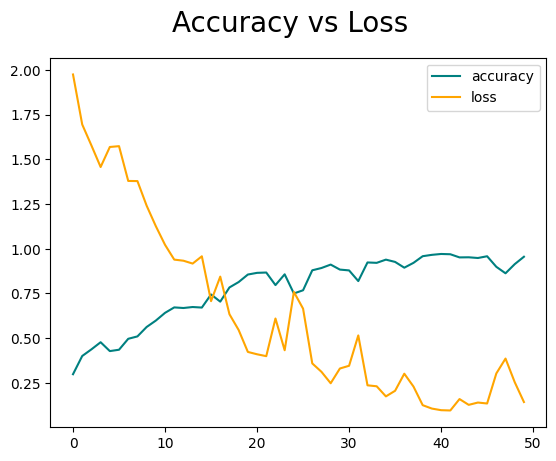

In [18]:

## plot the  accuracy  and loss
fig=plt.figure()
plt.plot(history.history['accuracy'], color='teal',label='accuracy')
plt.plot(history.history['loss'], color='orange', label='loss')
plt.suptitle('Accuracy vs Loss', fontsize=20)
plt.legend()
plt.show()

In [19]:
## Test set

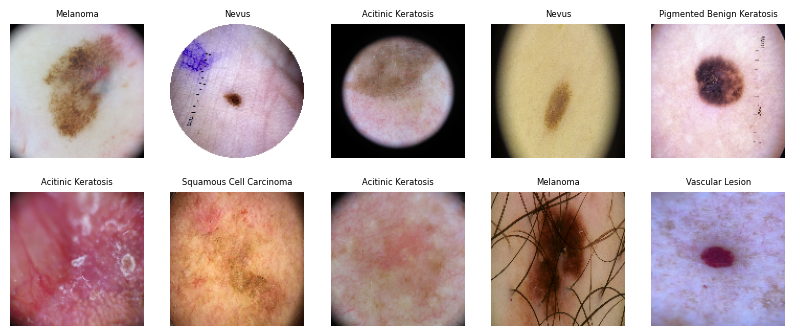

In [20]:
## Plot the testing set sample

plt.figure(figsize=(10,4))
for image,label in test_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]], fontsize=6)
    plt.axis('off')

In [21]:
## Get the test data image and its label shape
def test_image():
  for image,label in test_set:
    return image
test_image=test_image()
print(test_image.shape)


def test_image_label():
  for image,label in test_set:
    return label
test_label=test_image_label()
print(test_label.shape)

(32, 128, 128, 3)
(32,)
